<a href="https://colab.research.google.com/github/Its-Suryakumar/Image-Temperature-DIP/blob/main/ImageTemperature_DA3_21MIS1146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Temperature**
## Suryakumar P 21MIS1146

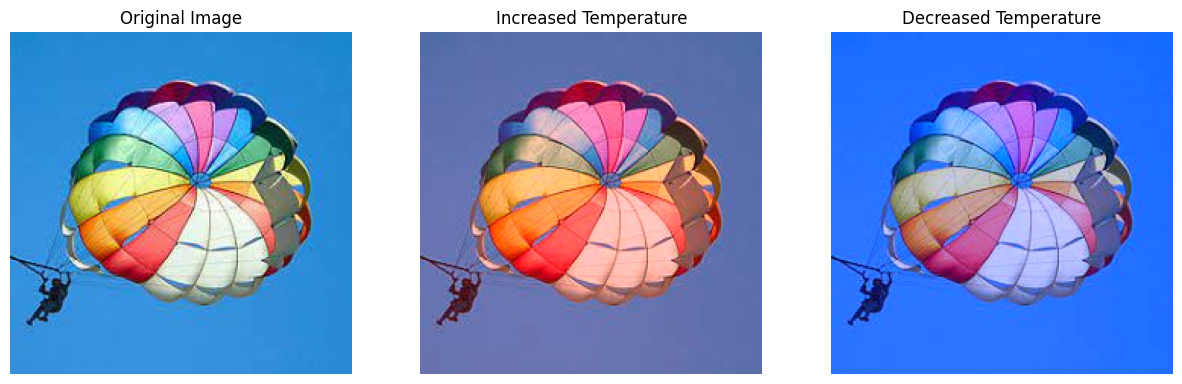

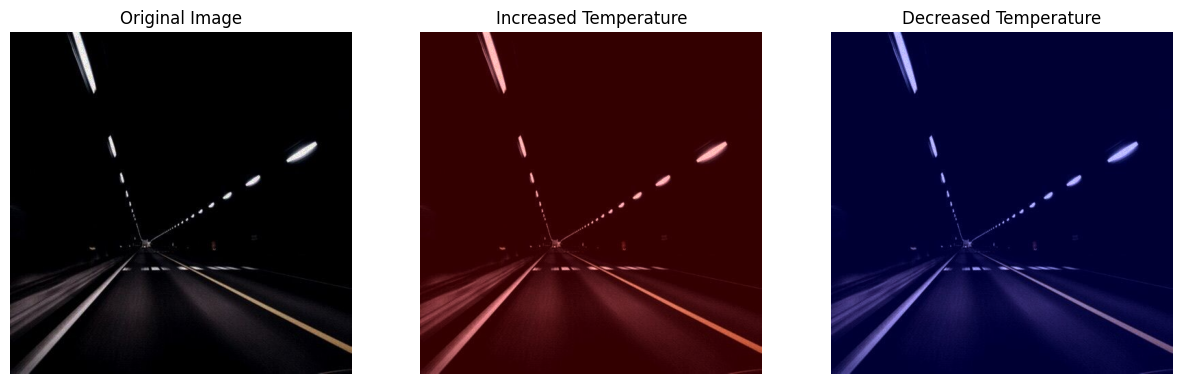

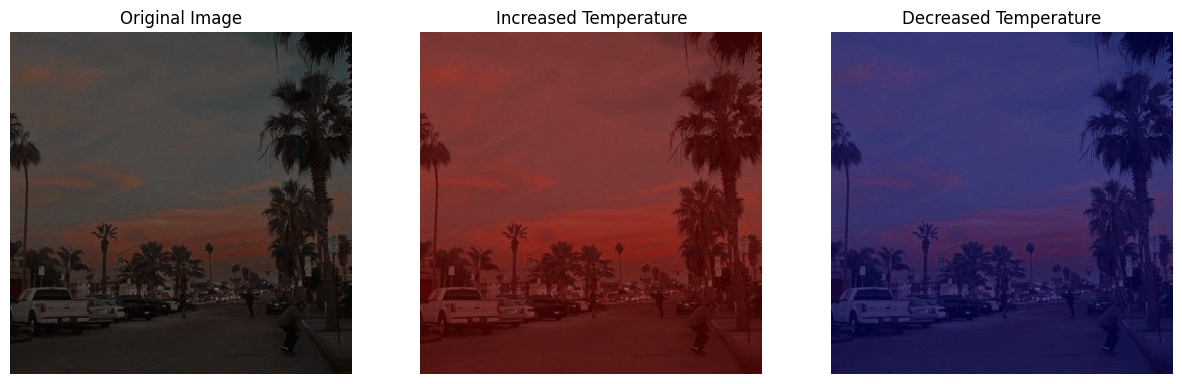

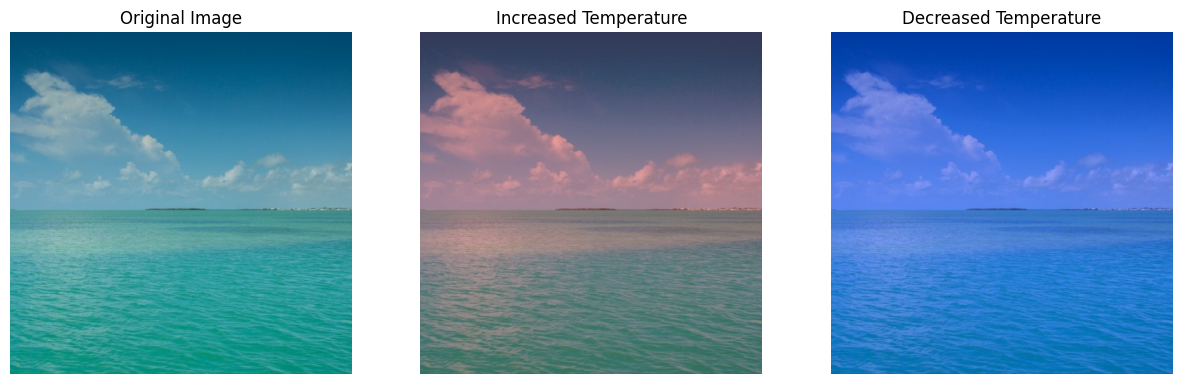

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_temperature(image, temperature):
    # Split the image into its color channels (B, G, R)
    blue, green, red = cv2.split(image)

    # Increase temperature (boost red and green, reduce blue)
    increased_temperature = np.zeros_like(image)
    increased_temperature[:, :, 0] = blue * (1 - temperature)
    increased_temperature[:, :, 1] = green * (1 - temperature)
    increased_temperature[:, :, 2] = red + temperature

    # Decrease temperature (boost blue, reduce red and green)
    decreased_temperature = np.zeros_like(image)
    decreased_temperature[:, :, 0] = blue + temperature
    decreased_temperature[:, :, 1] = green * (1 - temperature)
    decreased_temperature[:, :, 2] = red * (1 - temperature)

    return increased_temperature, decreased_temperature

def main(directory_path):
    # Get the list of image file names in the specified directory
    image_files = [f for f in os.listdir(directory_path) if f.endswith(".jpg") or f.endswith(".png") or f.endswith(".jpeg")]

    for image_file in image_files:
        # Read the color image
        image_path = os.path.join(directory_path, image_file)
        color_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # Normalize pixel values to the range [0, 1]
        color_image = color_image.astype(np.float32) / 255.0

        # Adjust temperature for the color image
        temperature = 0.2  # ]Temperature value (0.0 to 1.0)
        increased_temp, decreased_temp = adjust_temperature(color_image, temperature)

        # Plot the original, increased temperature, and decreased temperature images side by side
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(increased_temp, cv2.COLOR_BGR2RGB))
        plt.title("Increased Temperature")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(decreased_temp, cv2.COLOR_BGR2RGB))
        plt.title("Decreased Temperature")
        plt.axis("off")

        plt.show()

if __name__ == "__main__":
    directory_path = "/content/input-images"
    main(directory_path)
